In [1]:
# -*- coding: utf-8 -*-

# Get filename from the absolute file path
def getfilename(abs_file_path):
    return abs_file_path.split('/')[-1]

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Show an Image 
def showImage(abs_file_path):
    image = cv2.imread(abs_file_path)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.title(getfilename(abs_file_path))
    plt.show()

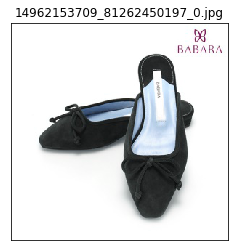

In [3]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pymongo

#Connect to mongoDB
conn = pymongo.MongoClient('localhost', 27017)
db = conn.get_database('image_cluster')

# Absolute file path of  training data images
train_data = np.array([])

# Target Label of training data
train_target = np.array([])

# Get all absolute file path and target labels in the train directory

path = os.getcwd()+"/train"

for root, dirs, files in os.walk(path):
    for filename in files:
        train_target = np.append(train_target, filename.split('_')[0])
        train_data = np.append(train_data, os.path.join(root, filename))
        
showImage(train_data[0])

In [7]:
# Applying SIFT detection to train data
sift_train_data = np.array([])
sift_kps = list()

for data in train_data:
    img = cv2.imread(data)
    gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray,None)
    
    collection = db.get_collection(getfilename(data))
    sift_row = {}
    
    for kp, des in zip(keypoints, descriptors):
        sift_row['keypoint'] = kp.pt
        sift_row['descriptor'] = des.tolist()
        sift_row['label'] = getfilename(data).split('_')[0]
        collection.save(sift_row)
        
    kp_img = cv2.drawKeypoints(gray, keypoints, img ,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    sift_train_data = np.append(sift_train_data, img)

/Users/gimseongtae/anaconda2/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: save is deprecated. Use insert_one or replace_one instead


KeyboardInterrupt: 